<a href="https://colab.research.google.com/github/ralfcam/Stockwell-Transform-Colab/blob/master/S_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stockwell Transform Colab

## Enviroment Setup

In [0]:
%%capture
!sudo apt-get install libfftw3-dev
!pip install git+git://github.com/claudiodsf/stockwell

In [0]:
import numpy as np
from scipy.signal import ricker
import matplotlib.pyplot as plt
from stockwell import st

## Time series synthesis

In [0]:
start_seconds = 0
end_seconds = 1
points = 30000

a = 3000   # Width parameter of the wavelet
w = ricker(points, a)

## Stockwell Transform parameters

In [0]:
fmin = 0  # Hz
fmax = 5  # Hz
df = 1./(end_seconds-start_seconds)  # sampling step in frequency domain (Hz)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(w, fmin_samples, fmax_samples)
extent = (start_seconds, end_seconds, fmin, fmax)

## Vizualization

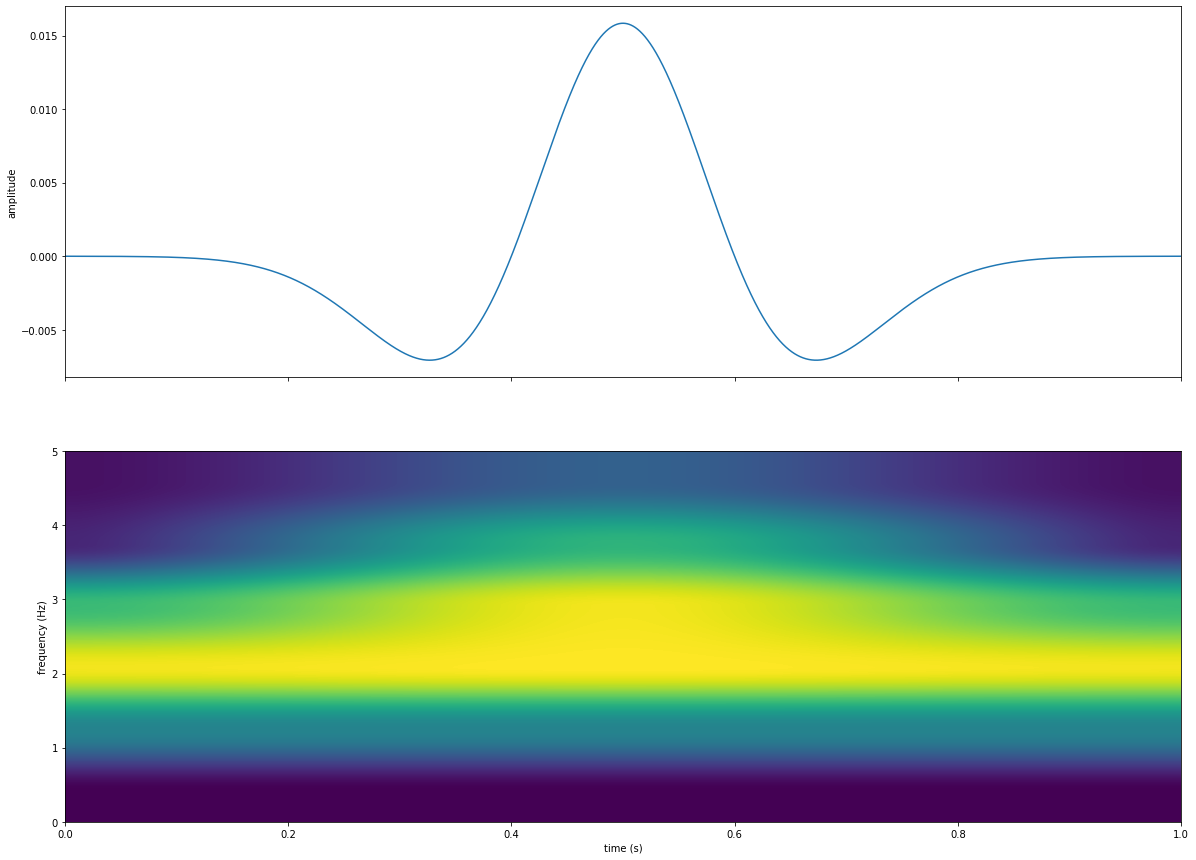

In [5]:
t = np.linspace(start_seconds, end_seconds, points)
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20,15))
ax[0].plot(t, w)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()